<a href="https://colab.research.google.com/github/AdarshSinghRajawat8829/TASK1_CODSOFT/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 10 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCar

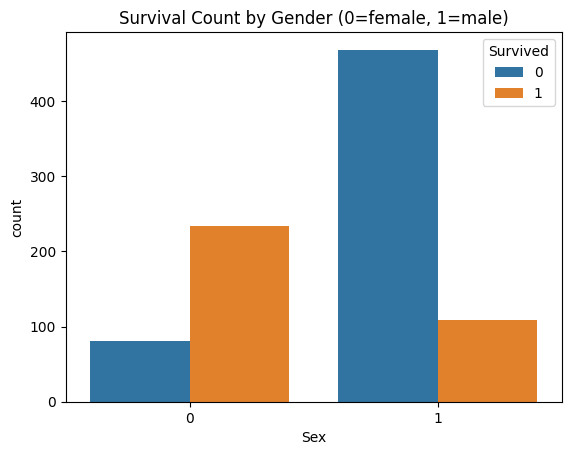

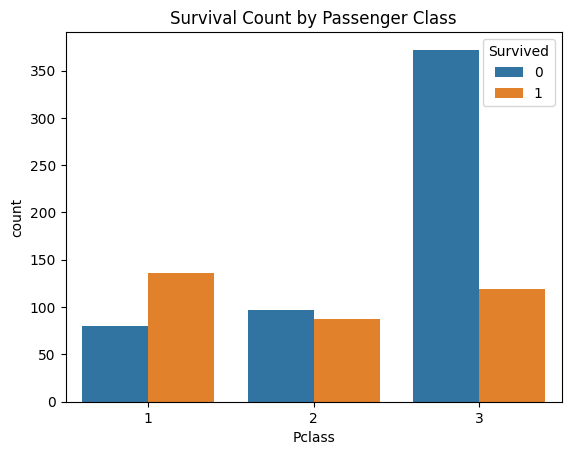

Predictions on the test set:
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]

Actual values from the test set:
[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
Model Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74



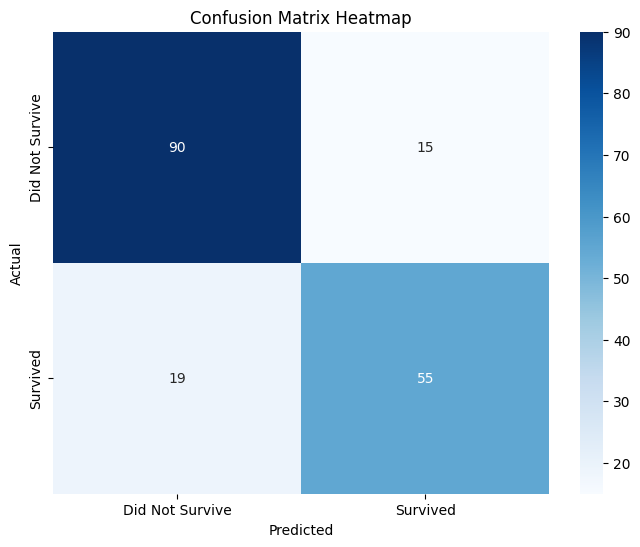

Prediction for a 30-year-old female in 1st class: Survived
Prediction for a 25-year-old male in 3rd class: Did Not Survive


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Load the dataset. Make sure the file is in your Colab environment.
df = pd.read_csv("Titanic-Dataset.csv")

# Display the first 10 rows of the dataset
print("First 10 rows of the dataset:")
print(df.head(10))

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Get descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values in each column
print("Missing values before cleaning:\n")
print(df.isnull().sum())

# Drop non-essential columns with many missing values or little predictive power
df.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Fare' values with the mean fare
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Fill missing 'Embarked' values with the mode (most frequent port)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check again for missing values to confirm cleanup
print("\nMissing values after cleaning:\n")
print(df.isnull().sum())

# Use LabelEncoder to convert 'Sex' and 'Embarked' to numerical values
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

# Display the first 10 rows with the newly encoded columns
print("First 10 rows after encoding categorical features:\n")
print(df.head(10))

# Select features (X) and target variable (Y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df['Survived']

# Visualize the count of survivals based on Gender
sns.countplot(x=df['Sex'], hue=df['Survived'])
plt.title('Survival Count by Gender (0=female, 1=male)')
plt.show()

# Visualize the count of survivals based on Passenger Class
sns.countplot(x=df['Pclass'], hue=df['Survived'])
plt.title('Survival Count by Passenger Class')
plt.show()

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, Y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

print("Predictions on the test set:")
print(predictions)

print("\nActual values from the test set:")
print(Y_test.values)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f"Model Accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(Y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(Y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Let's predict survival for a new passenger with some sample data.
# The features are: Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# Remember: Sex: 0=female, 1=male; Embarked: 0=C, 1=Q, 2=S

# Example 1: A female (Sex=0) in first class (Pclass=1)
sample_data_1 = np.array([[1, 0, 30, 0, 0, 100, 2]])
prediction_1 = model.predict(sample_data_1)
print(f"Prediction for a 30-year-old female in 1st class: {'Survived' if prediction_1[0] == 1 else 'Did Not Survive'}")

# Example 2: A male (Sex=1) in third class (Pclass=3)
sample_data_2 = np.array([[3, 1, 25, 0, 0, 15, 2]])
prediction_2 = model.predict(sample_data_2)
print(f"Prediction for a 25-year-old male in 3rd class: {'Survived' if prediction_2[0] == 1 else 'Did Not Survive'}")

### Additional Data Visualizations

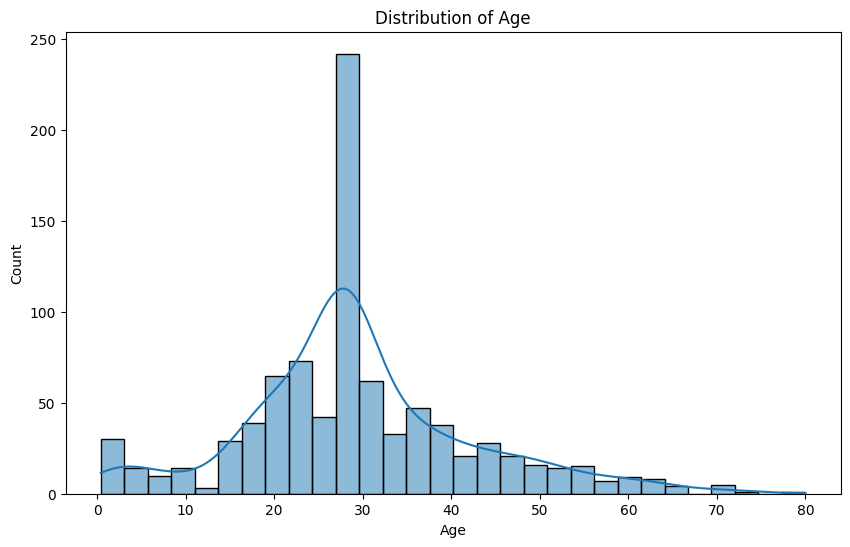

In [6]:
# Visualize the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

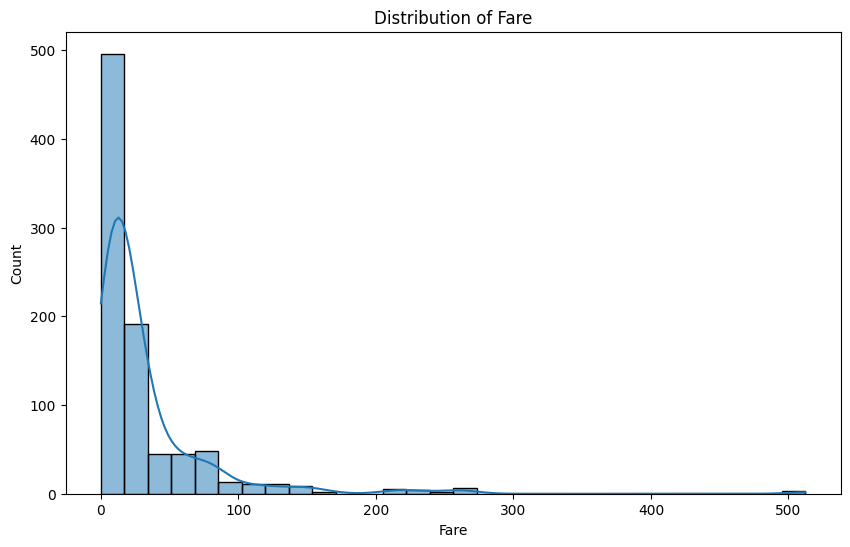

In [7]:
# Visualize the distribution of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

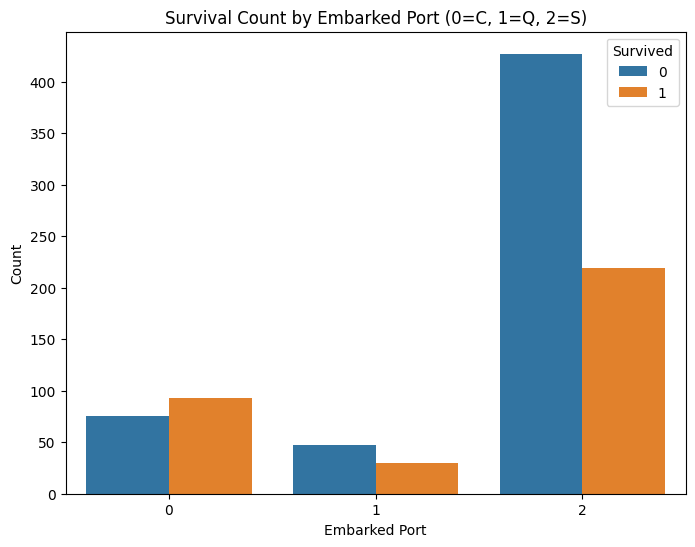

In [8]:
# Visualize survival count by Embarked port
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port (0=C, 1=Q, 2=S)')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()